<a href="https://colab.research.google.com/github/Sarathns05/Big_Mart_Sales_Prediction/blob/main/Big_mart_Sales_Prediction2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries**












In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore")

from sklearn.preprocessing import *
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.svm import SVR

**Load Dataset**



In [3]:
train = pd.read_csv("/content/drive/MyDrive/Luminar_Projects/Big_mart_Sales_Prediction/train.csv")
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# **Basic EDA**

In [4]:
print(f"Total Rows    : {train.shape[0]}")
print(f"Total Columns : {train.shape[1]}")
print("-----------------------------------------------------------")
print(train.info())

Total Rows    : 8523
Total Columns : 12
-----------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: f

In [5]:
# Checking unique values
train.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [6]:
# Checking null values
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
# Describing data
train.describe().T


,count,mean,std,min,25%,50%,75%,max
Item_Weight,7060.0,12.857645,4.643456,4.555,8.773750,12.600000,16.850000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


In [8]:
# Correlation on Dataset based on Target variable
train.corr()['Item_Outlet_Sales']


Item_Weight                  0.014123
Item_Visibility             -0.128625
Item_MRP                     0.567574
Outlet_Establishment_Year   -0.049135
Item_Outlet_Sales            1.000000
Name: Item_Outlet_Sales, dtype: float64

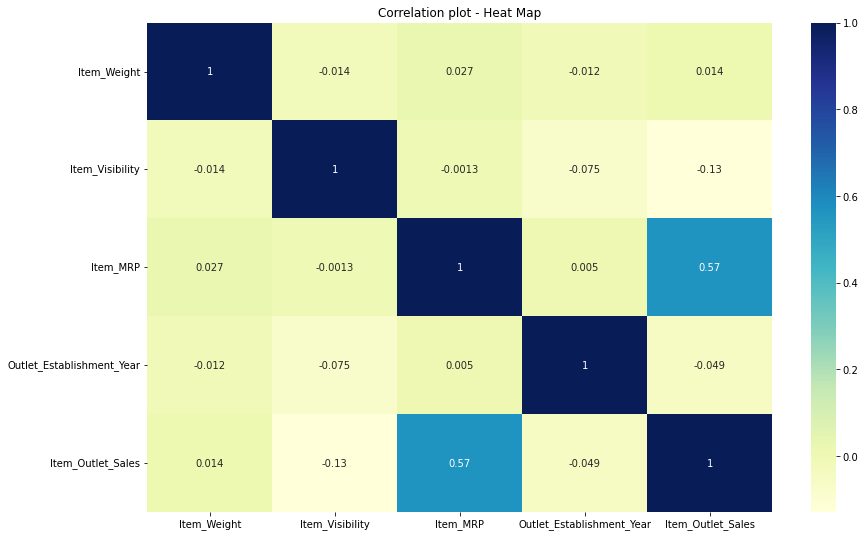

In [9]:
# Correlation using Heat Map in Input Dataset

plt.figure(figsize=(14,9))
sns.heatmap(train.corr(),annot=True,cmap="YlGnBu")
plt.title("Correlation plot - Heat Map")
plt.show()


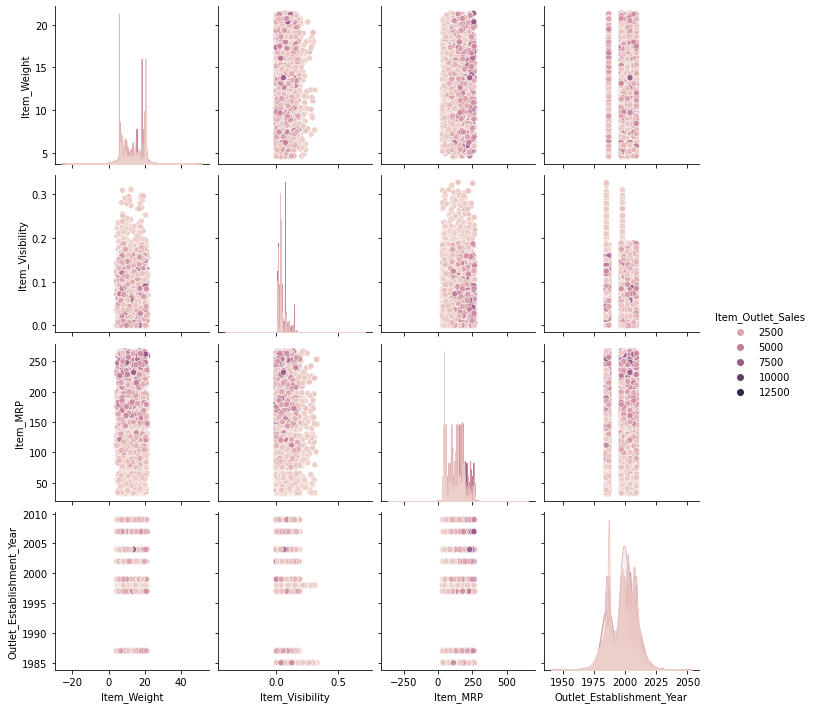

In [10]:
# Pairplot using sns
sns.pairplot(train,hue="Item_Outlet_Sales")


# Missing Value Treatment



In [11]:
# Checking null values
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [12]:
# Impute Missing Values 

train['Item_Weight'].fillna(train['Item_Weight'].mean(), inplace = True)
train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0],inplace=True)

train.isnull().sum()


Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [13]:
train['Outlet_Year'] = 2022 - train['Outlet_Establishment_Year']

In [14]:
# Dropping unwanted features
train.drop(["Outlet_Establishment_Year","Item_Identifier","Outlet_Identifier"],inplace = True,axis =1)

# Outlier Treatment

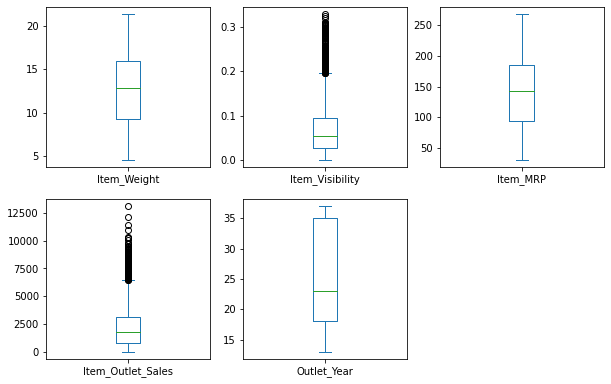

In [15]:
# Outlier detection using Box plot

train.plot(kind="box", subplots=True, layout=(3,3), figsize=(10,10))
plt.show()



In [16]:
# Handling Outliers with Percentile

cols = ['Item_Visibility','Item_Visibility']

for column in cols:
  uplimit = train[column].quantile(0.95)
  lowlimit = train[column].quantile(0.05)
  train.loc[(train[column] > uplimit),column] = uplimit
  train.loc[(train[column] < lowlimit),column] = lowlimit



In [17]:
#cols = ['Item_Visibility','Item_Visibility']

#for column in cols:
#  upper_lim=train[column].mean()+train[column].std() *3
#  lower_lim=train[column].mean()-train[column].std() *3

#  train.loc[(train[column] > upper_lim),column] = upper_lim
#  train.loc[(train[column] < lower_lim),column] = lower_lim


# Exploring Categorical Data



In [18]:
objectCols = train.select_dtypes(include=np.object).columns
train[objectCols].head()

,Item_Fat_Content,Item_Type,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,Low Fat,Dairy,Medium,Tier 1,Supermarket Type1
1,Regular,Soft Drinks,Medium,Tier 3,Supermarket Type2
2,Low Fat,Meat,Medium,Tier 1,Supermarket Type1
3,Regular,Fruits and Vegetables,Medium,Tier 3,Grocery Store
4,Low Fat,Household,High,Tier 3,Supermarket Type1


In [19]:
# Unique values in categorical features
print(f"Outlet Size          : {train['Outlet_Size'].unique()}")
print(f"Item Fat Content     : {train['Item_Fat_Content'].unique()}")
print(f"Outlet LOcation Type : {train['Outlet_Location_Type'].unique()}")
print(f"Item_Type            : {train['Item_Type'].unique()}")
print(f"Outlet_Type          : {train['Outlet_Type'].unique()}")

objectCols.unique()


Outlet Size          : ['Medium' 'High' 'Small']
Item Fat Content     : ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
Outlet LOcation Type : ['Tier 1' 'Tier 3' 'Tier 2']
Item_Type            : ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
Outlet_Type          : ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

# Convert categorical columns into numerical values

In [20]:
# Mapping 

train['Outlet_Size'] = train['Outlet_Size'].map({"Small":1,"Medium":2,"High":3})
train['Item_Fat_Content'] = train['Item_Fat_Content'].map({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})
train['Outlet_Location_Type'] = train['Outlet_Location_Type'].map({'Tier 1':1, 'Tier 2':2, 'Tier 3':3})

In [21]:
train['Item_Fat_Content'].value_counts()

Low Fat    428
Regular    117
Name: Item_Fat_Content, dtype: int64

In [22]:
#train['Item_Fat_Content'] = train['Item_Fat_Content'].replace({'nan':'High Fat'})
train.isnull().sum()

Item_Weight                0
Item_Fat_Content        7978
Item_Visibility            0
Item_Type                  0
Item_MRP                   0
Outlet_Size                0
Outlet_Location_Type       0
Outlet_Type                0
Item_Outlet_Sales          0
Outlet_Year                0
dtype: int64

In [23]:
train['Item_Fat_Content'].fillna(train['Item_Fat_Content'].mode()[0],inplace=True)
train.isnull().sum()

Item_Weight             0
Item_Fat_Content        0
Item_Visibility         0
Item_Type               0
Item_MRP                0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
Item_Outlet_Sales       0
Outlet_Year             0
dtype: int64

In [24]:
train['Item_Fat_Content'].value_counts()

Low Fat    8406
Regular     117
Name: Item_Fat_Content, dtype: int64

**Label Encoding**

In [25]:
le = LabelEncoder() 
train['Item_Fat_Content']= le.fit_transform(train['Item_Fat_Content']) 
train['Outlet_Location_Type']=le.fit_transform(train['Outlet_Location_Type'])
train['Item_Type']=le.fit_transform(train['Item_Type'])
train['Outlet_Type']=le.fit_transform(train['Outlet_Type'])

train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Year
0,9.30,0,0.016047,4,249.8092,2,0,1,3735.1380,23
1,5.92,0,0.019278,14,48.2692,2,2,2,443.4228,13
2,17.50,0,0.016760,10,141.6180,2,0,1,2097.2700,23
3,19.20,0,0.000000,6,182.0950,2,2,0,732.3800,24
4,8.93,0,0.000000,9,53.8614,3,2,1,994.7052,35


In [26]:
train.shape

(8523, 10)

# Train Test Split

In [27]:
X = train.drop(['Item_Outlet_Sales'],axis=1)
y = train['Item_Outlet_Sales']
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3,random_state=42)



In [28]:
print(X.shape)
print(y.shape)


(8523, 9)
(8523,)


In [29]:
X

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Year
0,9.300,0,0.016047,4,249.8092,2,0,1,23
1,5.920,0,0.019278,14,48.2692,2,2,2,13
2,17.500,0,0.016760,10,141.6180,2,0,1,23
3,19.200,0,0.000000,6,182.0950,2,2,0,24
4,8.930,0,0.000000,9,53.8614,3,2,1,35
...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,13,214.5218,3,2,1,35
8519,8.380,0,0.046982,0,108.1570,2,1,1,20
8520,10.600,0,0.035186,8,85.1224,1,1,1,18
8521,7.210,0,0.145221,13,103.1332,2,2,2,13


# Scale Down

In [30]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [31]:
# sc = MinMaxScaler()
# X_train_sc = sc.fit_transform(X_train)
# X_test_sc = sc.transform(X_test)
#X_train_sc = pd.DataFrame(X_train_sc)
#X_test_sc = pd.DataFrame(X_test_sc)

In [32]:
import joblib
joblib.dump(sc,'/content/drive/MyDrive/Luminar_Projects/Big_mart_Sales_Prediction/scaled.pkl')

['/content/drive/MyDrive/Luminar_Projects/Big_mart_Sales_Prediction/scaled.pkl']

# Model Building

**Applying all Regression Algorithms**

In [33]:
lr_reg = LinearRegression()
r_reg = Ridge()
ls_reg = Lasso()
dt_reg = DecisionTreeRegressor() 
rf_reg = RandomForestRegressor()
svr_reg = SVR()
Adb_reg = AdaBoostRegressor()
gb_reg = GradientBoostingRegressor()
xgb_reg = XGBRegressor(objective ='reg:squarederror')
voting = VotingRegressor( estimators=[('Linear_Regression',lr_reg),('Decision_Tree',dt_reg),('Random_Forest',rf_reg),
                                    ('SVR',svr_reg),('Gradient_Boosting',gb_reg)] )   #(Adb_reg,'Ada_boosting'),(xgb_reg,'xgboost')
voting.fit(X_train,y_train)

VotingRegressor(estimators=[('Linear_Regression', LinearRegression()),
                            ('Decision_Tree', DecisionTreeRegressor()),
                            ('Random_Forest', RandomForestRegressor()),
                            ('SVR', SVR()),
                            ('Gradient_Boosting', GradientBoostingRegressor())])

In [34]:
for reg in (lr_reg,r_reg,ls_reg,dt_reg,rf_reg,svr_reg,Adb_reg,gb_reg,xgb_reg,voting):
  reg.fit(X_train, y_train) 

  y_pred = reg.predict(X_test)
  print(reg.__class__.__name__, reg.score(X_train,y_train))
  print(reg.__class__.__name__, reg.score(X_test,y_test))
  print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
  print("=========================")


LinearRegression 0.50500664327337
LinearRegression 0.5114305652860127
RMSE: 1169.820423954255
Ridge 0.5049958805055009
Ridge 0.5116040065111802
RMSE: 1169.6127635039902
Lasso 0.5048193070936101
Lasso 0.512040384028578
RMSE: 1169.0901273852771
DecisionTreeRegressor 1.0
DecisionTreeRegressor 0.18383378119039073
RMSE: 1511.9776109905765
RandomForestRegressor 0.9368410119395694
RandomForestRegressor 0.5593709708487498
RMSE: 1110.945119535706
SVR 0.17039294451158216
SVR 0.18565461043582943
RMSE: 1510.2900930635367
AdaBoostRegressor 0.4934354595407453
AdaBoostRegressor 0.46466461484627664
RMSE: 1224.528868088915
GradientBoostingRegressor 0.6374450781746623
GradientBoostingRegressor 0.5967625154063572
RMSE: 1062.7631835626878
XGBRegressor 0.6336548755449336
XGBRegressor 0.5989174863211857
RMSE: 1059.9195840969317
VotingRegressor 0.7953529776587243
VotingRegressor 0.5610675876992999
RMSE: 1108.8042414256004


# Hyperparameter Tunning

In [35]:
reg_list = [lr_reg,r_reg,ls_reg,dt_reg,rf_reg,Adb_reg,gb_reg,svr_reg,xgb_reg]

grid_params_lr = [{'fit_intercept' : [True, False],'normalize' : [True, False]}]  

grid_params_r= [{'alpha':[550, 580, 600, 620, 650],}] 

grid_params_ls= [{'alpha':[0.005, 0.02, 0.03, 0.0, 0.06]}] 

grid_params_dt =[{'criterion':['squared_error','friedman_mse', 'absolute_error'], 'splitter':['best','random'],'max_depth':[3,4,5],'min_samples_split':[2,3,4],'max_features':["auto","sqrt","log2"]}] 

grid_params_rf=[{'bootstrap': [True], 'max_depth': [5, 10, None], 'max_features': ['sqrt', 'log2'], 'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}] 

grid_params_adaboost=[{'n_estimators':[10,50,250,1000],'learning_rate':[0.01,0.1],'loss':['linear','square','exponential']}] 

grid_params_grad=[{'loss':['squared_error','absolute_error','huber','quantile'],'learning_rate':[1,7,9],'criterion':['friedman_mse','squared_error']}] 

grid_params_svr=[{'kernel':['linear','poly','rbf'],'degree':[3,4,5]}] 

grid_params_xgb=[{'n_estimators': [100, 500, 900, 1100, 1500],'max_depth': [2, 3, 5, 10, 15],'booster':['gbtree','gblinear'],'learning_rate':[0.05,0.1,0.15,0.20]}] 

reg_params = [grid_params_lr,grid_params_r,grid_params_ls,grid_params_dt,grid_params_rf,grid_params_adaboost,grid_params_grad,grid_params_svr,grid_params_xgb] #,grid_params_r,grid_params_ls


In [36]:
for reg,reg_param in zip(reg_list,reg_params):

  print(f"The Regressor is {reg} and its hyper params are {reg_param}") 
  grid = GridSearchCV(estimator=reg, param_grid=reg_param,cv=5,scoring='r2')        #n_iter=50,scoring = 'neg_mean_absolute_error',n_jobs = 4,return_train_score = True,random_state=42
  grid.fit(X_train_sc,y_train) 
 
  print(f"The Train accuracy for the {reg} is {grid.score(X_train_sc,y_train)}") 
  print(f"The Test accuracy for the {reg} is {grid.score(X_test_sc,y_test)}") 
  print("====================\n")

The Regressor is LinearRegression() and its hyper params are [{'fit_intercept': [True, False], 'normalize': [True, False]}]
The Train accuracy for the LinearRegression() is 0.50500664327337
The Test accuracy for the LinearRegression() is 0.5114305652860129

The Regressor is Ridge() and its hyper params are [{'alpha': [550, 580, 600, 620, 650]}]
The Train accuracy for the Ridge() is 0.4991452206560849
The Test accuracy for the Ridge() is 0.5082119317816889

The Regressor is Lasso() and its hyper params are [{'alpha': [0.005, 0.02, 0.03, 0.0, 0.06]}]
The Train accuracy for the Lasso() is 0.5050066237902434
The Test accuracy for the Lasso() is 0.5114370891203552

The Regressor is DecisionTreeRegressor() and its hyper params are [{'criterion': ['squared_error', 'friedman_mse', 'absolute_error'], 'splitter': ['best', 'random'], 'max_depth': [3, 4, 5], 'min_samples_split': [2, 3, 4], 'max_features': ['auto', 'sqrt', 'log2']}]
The Train accuracy for the DecisionTreeRegressor() is 0.6046170757

In [37]:
grid.best_estimator_

XGBRegressor(learning_rate=0.05, objective='reg:squarederror')

In [41]:
grid.best_params_

{'booster': 'gbtree',
 'learning_rate': 0.05,
 'max_depth': 3,
 'n_estimators': 100}

Making the best model - XGBRegressor

In [43]:
Xgb_reg = XGBRegressor(objective ='reg:squarederror',booster='gbtree',learning_rate=0.05,max_depth=3,n_estimators=100) 
Xgb_reg.fit(X_train_sc,y_train)

XGBRegressor(learning_rate=0.05, objective='reg:squarederror')

Saving the model

In [44]:
import joblib
joblib.dump(Xgb_reg,'/content/drive/MyDrive/Luminar_Projects/Big_mart_Sales_Prediction/model.pkl')


['/content/drive/MyDrive/Luminar_Projects/Big_mart_Sales_Prediction/model.pkl']

In [40]:
# ! pip install xgboost==1.6